In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from scipy.signal.windows import gaussian
from scipy.ndimage import convolve1d
import yfinance as yf
import matplotlib.pyplot as plt


# Init all data
df1 = pd.read_csv('dxy.csv', usecols=['Date', 'Close', 'Open'])
df2 = pd.read_csv('xauusd.csv', usecols=['Date', 'Price', 'Open'])

# Use 'Date' column as datetime type
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# Merge
merged_df = pd.merge(df1, df2, on='Date', how='inner')

# Rename
merged_df['DXY-Close'] = merged_df['Close'].astype(float)
merged_df['DXY-Open'] = merged_df['Open_x'].astype(float)
merged_df['XAUUSD-Close'] = merged_df['Price'].str.replace(',', '').astype(float)
merged_df['XAUUSD-Open'] = merged_df['Open_y'].str.replace(',', '').astype(float)
merged_df['XAUUSD'] = (merged_df['XAUUSD-Close']-merged_df['XAUUSD-Open'])/merged_df['XAUUSD-Open']
merged_df['DXY'] = (merged_df['DXY-Close']-merged_df['DXY-Open'])/merged_df['DXY-Open']
merged_df = merged_df.drop(['Close', 'Price','Open_x','Open_y'], axis=1)
    
print(merged_df)

           Date   DXY-Close    DXY-Open  XAUUSD-Close  XAUUSD-Open    XAUUSD  \
0    1990-01-02   94.290001   93.129997           NaN          NaN       NaN   
1    1990-01-03   94.419998   94.150002           NaN          NaN       NaN   
2    1990-01-04   92.519997   93.720001           NaN          NaN       NaN   
3    1990-01-05   92.849998   93.339996           NaN          NaN       NaN   
4    1990-01-08   92.050003   92.519997           NaN          NaN       NaN   
...         ...         ...         ...           ...          ...       ...   
9030 2024-05-06  105.050003  105.080002       2326.15      2293.98  0.014024   
9031 2024-05-07  105.410004  105.139999       2315.20      2326.31 -0.004776   
9032 2024-05-08  105.550003  105.419998       2309.05      2315.40 -0.002743   
9033 2024-05-09  105.230003  105.519997       2345.88      2309.04  0.015955   
9034 2024-05-10  105.249001  105.205002       2360.14      2346.26  0.005916   

           DXY  
0     0.012456  
1    

In [17]:
df = merged_df[['Date', 'DXY-Close', 'XAUUSD-Close']]

df['Year'] = df['Date'].dt.year

# Group by 'year' and calculate the correlation between 'column1' and 'column2'
correlations = df.groupby('Year').apply(lambda x: x['DXY-Close'].corr(x['XAUUSD-Close']))

print("\nCorrelation between 'column1' and 'column2' for each year:")
print(correlations)


Correlation between 'column1' and 'column2' for each year:
Year
2000   -0.795555
2001    0.018417
2002   -0.814422
2003   -0.773741
2004   -0.896042
2005    0.647136
2006   -0.766638
2007   -0.925409
2008   -0.836120
2009   -0.744050
2010   -0.206508
2011   -0.146855
2012   -0.704097
2013   -0.049451
2014   -0.850686
2015   -0.642199
2016   -0.616188
2017   -0.743908
2018   -0.862138
2019   -0.029595
dtype: float64


/var/folders/dv/v09r6fhd6mbc4b2pf4g8mm480000gn/T/ipykernel_53823/1061212790.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
/var/folders/dv/v09r6fhd6mbc4b2pf4g8mm480000gn/T/ipykernel_53823/1061212790.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = df.groupby('Year').apply(lambda x: x['DXY-Close'].corr(x['XAUUSD-Close']))


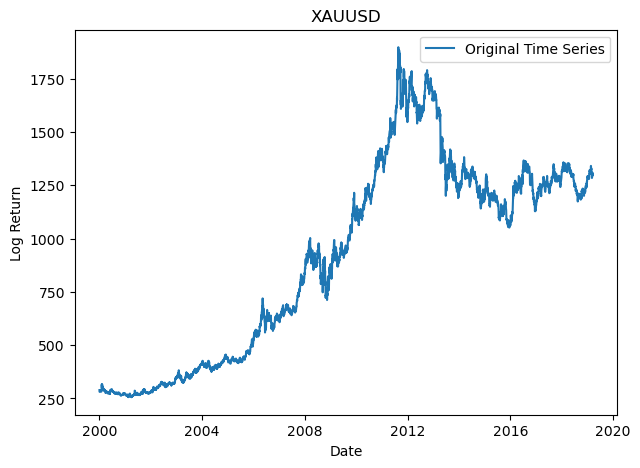

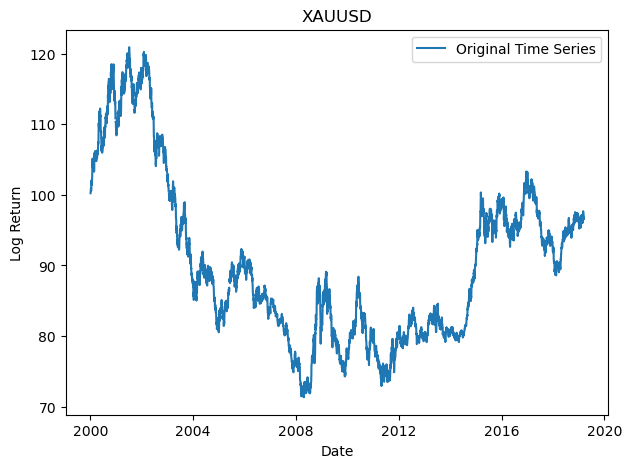

In [24]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

plt.figure(figsize=(7, 5))
plt.plot(df['XAUUSD-Close'], label='Original Time Series')
plt.title('XAUUSD')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.show()

plt.figure(figsize=(7, 5))
plt.plot(df['DXY-Close'], label='Original Time Series')
plt.title('XAUUSD')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.show()